In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
air_reserve = pd.read_csv('input/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
hpg_reserve = pd.read_csv('input/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
air_store_info = pd.read_csv('input/air_store_info.csv')
hpg_store_info = pd.read_csv('input/hpg_store_info.csv')
store_relation = pd.read_csv('input/store_id_relation.csv')
date_info = pd.read_csv('input/date_info.csv',parse_dates=['calendar_date'])
air_visit = pd.read_csv('input/air_visit_data.csv',parse_dates=['visit_date'])
sample_submission = pd.read_csv('input/sample_submission.csv')

In [3]:
hpg_reserve['visit_year'] = hpg_reserve['visit_datetime'].dt.year
hpg_reserve['visit_month'] = hpg_reserve['visit_datetime'].dt.month
hpg_reserve['visit_day'] = hpg_reserve['visit_datetime'].dt.day
hpg_reserve['reserve_year'] = hpg_reserve['reserve_datetime'].dt.year
hpg_reserve['reserve_month'] = hpg_reserve['reserve_datetime'].dt.month
hpg_reserve['reserve_day'] = hpg_reserve['reserve_datetime'].dt.day

hpg_reserve.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)

In [4]:
hpg_reserve.head()

,hpg_store_id,reserve_visitors,visit_year,visit_month,visit_day,reserve_year,reserve_month,reserve_day
0,hpg_c63f6f42e088e50f,1,2016,1,1,2016,1,1
1,hpg_dac72789163a3f47,3,2016,1,1,2016,1,1
2,hpg_c8e24dcf51ca1eb5,2,2016,1,1,2016,1,1
3,hpg_24bb207e5fd49d4a,5,2016,1,1,2016,1,1
4,hpg_25291c542ebb3bc2,13,2016,1,1,2016,1,1


In [5]:
hpg_reserve.shape

(2000320, 8)

In [6]:
hpg_reserve = hpg_reserve.groupby(['hpg_store_id', 'visit_year', 'visit_month',\
                                   'visit_day','reserve_year','reserve_month','reserve_day'], as_index=False).sum()

In [7]:
hpg_reserve.head()

,hpg_store_id,visit_year,visit_month,visit_day,reserve_year,reserve_month,reserve_day,reserve_visitors
0,hpg_001112ef76b9802c,2016,2,26,2016,2,9,9
1,hpg_001112ef76b9802c,2016,3,17,2016,3,3,3
2,hpg_001112ef76b9802c,2016,3,31,2016,3,25,5
3,hpg_001112ef76b9802c,2016,4,5,2016,4,1,13
4,hpg_001112ef76b9802c,2016,4,18,2016,4,15,9


In [8]:
hpg_reserve.shape

(1879302, 8)

In [9]:
air_reserve['visit_year'] = air_reserve['visit_datetime'].dt.year
air_reserve['visit_month'] = air_reserve['visit_datetime'].dt.month
air_reserve['visit_day'] = air_reserve['visit_datetime'].dt.day
air_reserve['reserve_year'] = air_reserve['reserve_datetime'].dt.year
air_reserve['reserve_month'] = air_reserve['reserve_datetime'].dt.month
air_reserve['reserve_day'] = air_reserve['reserve_datetime'].dt.day

air_reserve.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)

date_info['calendar_year'] = date_info['calendar_date'].dt.year
date_info['calendar_month'] = date_info['calendar_date'].dt.month
date_info['calendar_day'] = date_info['calendar_date'].dt.day

date_info.drop(['calendar_date'], axis=1, inplace=True)

air_visit['visit_year'] = air_visit['visit_date'].dt.year
air_visit['visit_month'] = air_visit['visit_date'].dt.month
air_visit['visit_day'] = air_visit['visit_date'].dt.day

air_visit.drop(['visit_date'], axis=1, inplace=True)

In [10]:
hpg_reserve = pd.merge(hpg_reserve, store_relation, on='hpg_store_id', how='inner')
hpg_reserve.drop(['hpg_store_id'], axis=1, inplace=True)
hpg_reserve.shape

(26532, 8)

In [11]:
hpg_reserve.head()

,visit_year,visit_month,visit_day,reserve_year,reserve_month,reserve_day,reserve_visitors,air_store_id
0,2016,1,9,2016,1,7,2,air_cbe867adcf44e14f
1,2016,1,11,2016,1,10,8,air_cbe867adcf44e14f
2,2016,1,14,2016,1,6,11,air_cbe867adcf44e14f
3,2016,1,15,2016,1,13,8,air_cbe867adcf44e14f
4,2016,1,18,2016,1,15,9,air_cbe867adcf44e14f


In [12]:
air_reserve = pd.concat([air_reserve, hpg_reserve])

In [13]:
air_reserve.head()

,air_store_id,reserve_day,reserve_month,reserve_visitors,reserve_year,visit_day,visit_month,visit_year
0,air_877f79706adbfb06,1,1,1,2016,1,1,2016
1,air_db4b38ebe7a7ceff,1,1,3,2016,1,1,2016
2,air_db4b38ebe7a7ceff,1,1,6,2016,1,1,2016
3,air_877f79706adbfb06,1,1,2,2016,1,1,2016
4,air_db80363d35f10926,1,1,5,2016,1,1,2016


In [14]:
air_reserve = air_reserve.groupby(['air_store_id', 'visit_year', 'visit_month','visit_day'],\
                as_index=False).sum().drop(['reserve_day','reserve_month','reserve_year'], axis=1)

In [15]:
air_reserve = pd.merge(air_reserve, date_info, left_on=['visit_year','visit_month','visit_day'], right_on=['calendar_year','calendar_month','calendar_day'], how='left')
air_reserve.drop(['calendar_year','calendar_month','calendar_day'], axis=1, inplace=True)

In [16]:
air_reserve.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,day_of_week,holiday_flg
0,air_00a91d42b08b08d9,2016,1,14,2,Thursday,0
1,air_00a91d42b08b08d9,2016,1,15,4,Friday,0
2,air_00a91d42b08b08d9,2016,1,16,2,Saturday,0
3,air_00a91d42b08b08d9,2016,1,22,2,Friday,0
4,air_00a91d42b08b08d9,2016,1,29,5,Friday,0


In [17]:
air_reserve.isnull().values.sum()

0

In [18]:
air_reserve = pd.merge(air_reserve, air_store_info, on='air_store_id', how='left')
air_reserve.shape

(42193, 11)

In [19]:
df = pd.merge(air_reserve, air_visit, on=['air_store_id','visit_year','visit_month','visit_day'], how='left')

In [20]:
df.shape

(42193, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42193 entries, 0 to 42192
Data columns (total 12 columns):
air_store_id        42193 non-null object
visit_year          42193 non-null int64
visit_month         42193 non-null int64
visit_day           42193 non-null int64
reserve_visitors    42193 non-null int64
day_of_week         42193 non-null object
holiday_flg         42193 non-null int64
air_genre_name      42193 non-null object
air_area_name       42193 non-null object
latitude            42193 non-null float64
longitude           42193 non-null float64
visitors            35698 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 4.2+ MB


In [23]:
df.shape

(42193, 12)

In [25]:
df.air_genre_name = df.air_genre_name.replace(' ', '_', regex=True)
df.air_genre_name = df.air_genre_name.replace('/', '_', regex=True)
df=df.rename(columns = {'air_genre_name':'genre','day_of_week':'dow'})

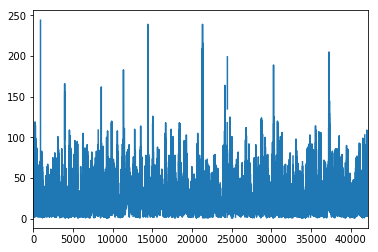

In [26]:
df.visitors.plot()

In [25]:
df.visitors.notnull().values.sum()

35698

In [26]:
df.shape

(42193, 12)

In [30]:
def RMSLE(predicted, actual):
    msle = (np.log(predicted+1) - np.log(actual+1))**2
    rmsle = np.sqrt(msle.sum()/msle.count())
    return rmsle

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42193 entries, 1167 to 24789
Data columns (total 31 columns):
air_store_id                          42193 non-null object
visit_year                            42193 non-null int64
visit_month                           42193 non-null int64
visit_day                             42193 non-null int64
reserve_visitors                      42193 non-null int64
holiday_flg                           42193 non-null int64
air_area_name                         42193 non-null object
latitude                              42193 non-null float64
longitude                             42193 non-null float64
visitors                              35698 non-null float64
genre_Asian                           42193 non-null uint8
genre_Bar_Cocktail                    42193 non-null uint8
genre_Cafe_Sweets                     42193 non-null uint8
genre_Creative_cuisine                42193 non-null uint8
genre_Dining_bar                      42193 non-null u

In [32]:
df = pd.get_dummies(df, columns=['genre','dow'])

In [34]:
df.drop(['air_store_id','air_area_name','latitude','longitude'], axis=1, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42193 entries, 1167 to 24789
Data columns (total 27 columns):
visit_year                            42193 non-null int64
visit_month                           42193 non-null int64
visit_day                             42193 non-null int64
reserve_visitors                      42193 non-null int64
holiday_flg                           42193 non-null int64
visitors                              35698 non-null float64
genre_Asian                           42193 non-null uint8
genre_Bar_Cocktail                    42193 non-null uint8
genre_Cafe_Sweets                     42193 non-null uint8
genre_Creative_cuisine                42193 non-null uint8
genre_Dining_bar                      42193 non-null uint8
genre_International_cuisine           42193 non-null uint8
genre_Italian_French                  42193 non-null uint8
genre_Izakaya                         42193 non-null uint8
genre_Japanese_food                   42193 non-null uint8
g

In [36]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [37]:
regr = RandomForestRegressor()

In [45]:
df = df.notnull()

In [54]:
X = df.drop('visitors', axis=1)
y = df['visitors'].values

In [57]:
y

array([False,  True,  True, ..., False, False, False], dtype=bool)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
y_pred = regr.predict(X_test)

In [53]:
y_pred

array([ 0.84673816,  0.84673816,  0.84673816, ...,  0.84673816,
        0.84673816,  0.84673816])